In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Superstore.csv", encoding='latin1')

# First 10 rows
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
# Convert date
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Create Revenue column
df['Revenue'] = df['Sales'] - df['Discount']

In [5]:
# Sales
print("Sales Mean:", df['Sales'].mean())
print("Sales Median:", df['Sales'].median())
print("Sales Mode:", df['Sales'].mode()[0])

# Profit
print("Profit Mean:", df['Profit'].mean())
print("Profit Median:", df['Profit'].median())
print("Profit Mode:", df['Profit'].mode()[0])

Sales Mean: 229.85800083049833
Sales Median: 54.489999999999995
Sales Mode: 12.96
Profit Mean: 28.65689630778467
Profit Median: 8.6665
Profit Mode: 0.0


In [6]:
# Range
print("Sales Range:", df['Sales'].max() - df['Sales'].min())

# Variance & Std
print("Sales Variance:", df['Sales'].var())
print("Sales Std:", df['Sales'].std())

# IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
print("Sales IQR:", Q3 - Q1)

Sales Range: 22638.036
Sales Variance: 388434.45530807687
Sales Std: 623.2451005086818
Sales IQR: 192.66


In [7]:
print("Sales Skewness:", df['Sales'].skew())
print("Sales Kurtosis:", df['Sales'].kurt())

Sales Skewness: 12.97275234181623
Sales Kurtosis: 305.311753246823


In [11]:
print("Avg sales by region")
print(df.groupby('Region')['Sales'].mean())

print("Avg profit by category")
print(df.groupby('Category')['Profit'].mean())

# Monthly sales
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

Avg sales by region
Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64
Avg profit by category
Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


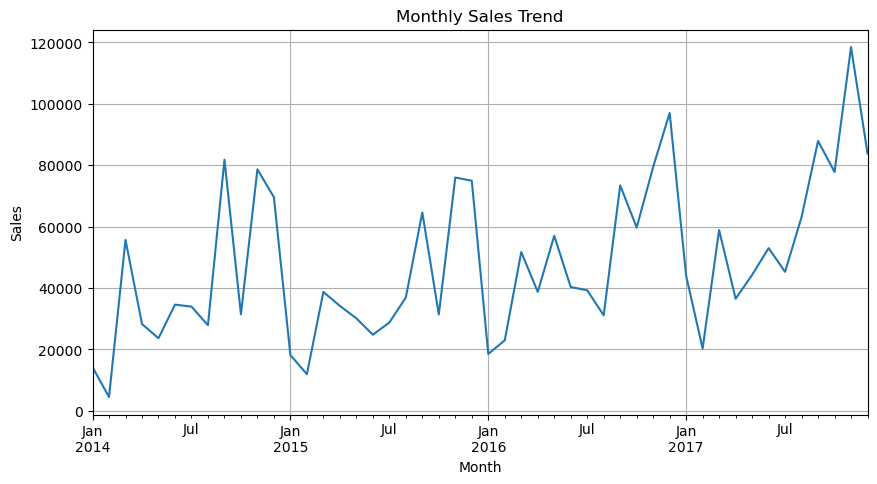

In [12]:
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

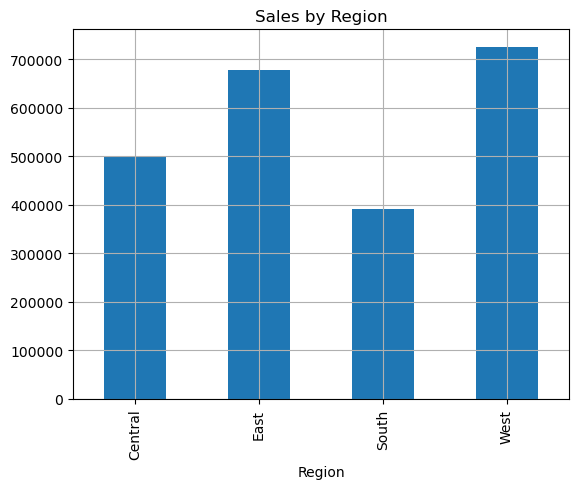

In [13]:
# Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.grid()
plt.show()


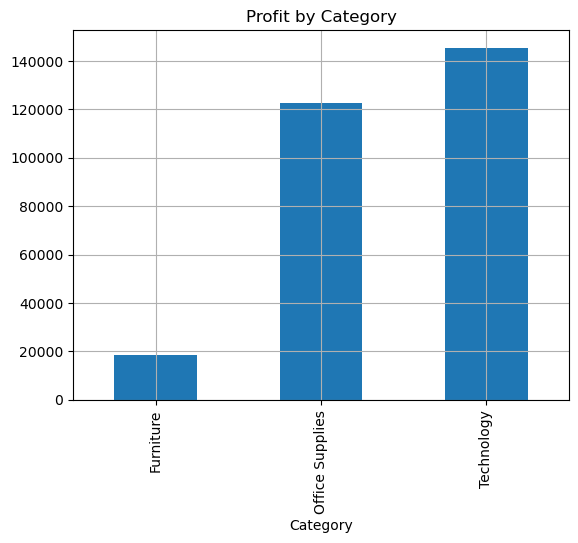

In [14]:
# Profit by Category
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title("Profit by Category")
plt.grid()
plt.show()

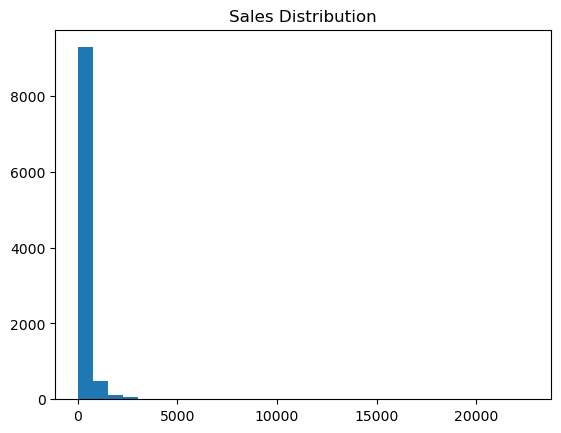

In [15]:
plt.hist(df['Sales'], bins=30)
plt.title("Sales Distribution")
plt.show()

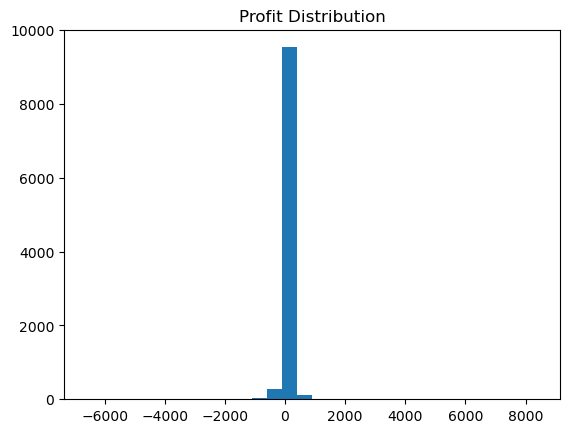

In [16]:
plt.hist(df['Profit'], bins=30)
plt.title("Profit Distribution")
plt.show()

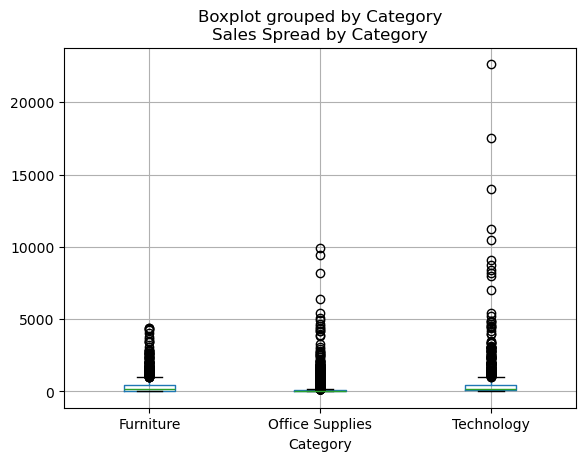

In [17]:
df.boxplot(column='Sales', by='Category')
plt.title("Sales Spread by Category")
plt.show()

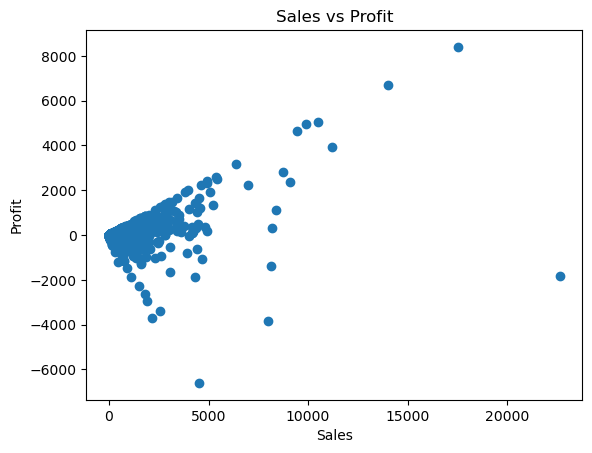

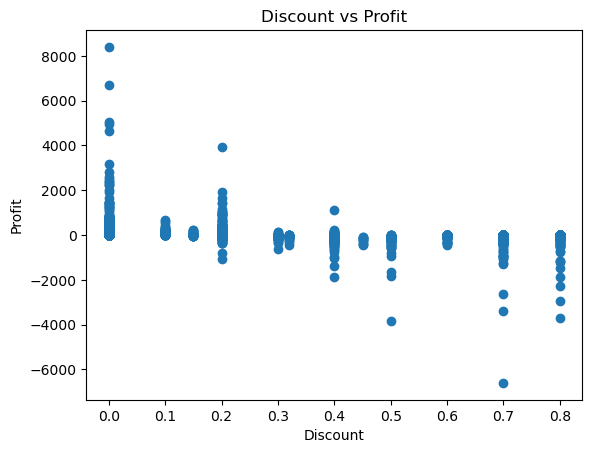

In [18]:
plt.scatter(df['Sales'], df['Profit'])
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

plt.scatter(df['Discount'], df['Profit'])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

In [19]:
cols = ['Sales','Profit','Discount','Quantity']

print("Covariance Matrix")
print(df[cols].cov())

print("\nCorrelation Matrix")
print(df[cols].corr())

Covariance Matrix
                  Sales        Profit   Discount    Quantity
Sales     388434.455308  69944.096586  -3.627228  278.459923
Profit     69944.096586  54877.798055 -10.615173   34.534769
Discount      -3.627228    -10.615173   0.042622    0.003961
Quantity     278.459923     34.534769   0.003961    4.951113

Correlation Matrix
             Sales    Profit  Discount  Quantity
Sales     1.000000  0.479064 -0.028190  0.200795
Profit    0.479064  1.000000 -0.219487  0.066253
Discount -0.028190 -0.219487  1.000000  0.008623
Quantity  0.200795  0.066253  0.008623  1.000000


In [20]:
avg_sales = df['Sales'].mean()

# Basic probabilities
print("P(Sales > avg):", (df['Sales'] > avg_sales).mean())
print("P(Profit < 0):", (df['Profit'] < 0).mean())
print("P(Region = West):", (df['Region'] == 'West').mean())

P(Sales > avg): 0.2361416850110066
P(Profit < 0): 0.18721232739643787
P(Region = West): 0.32049229537722634


In [21]:
# Loss given high discount (>20%)
cond_prob = df[df['Discount'] > 0.2]['Profit'].lt(0).mean()
print("P(Loss | Discount > 20%):", cond_prob)

P(Loss | Discount > 20%): 0.9676956209619526


In [22]:
p = (df['Profit'] > 0).mean()

simulated = np.random.binomial(1, p, 1000)

print("Actual:", p)
print("Simulated:", simulated.mean())

Actual: 0.8062837702621573
Simulated: 0.798


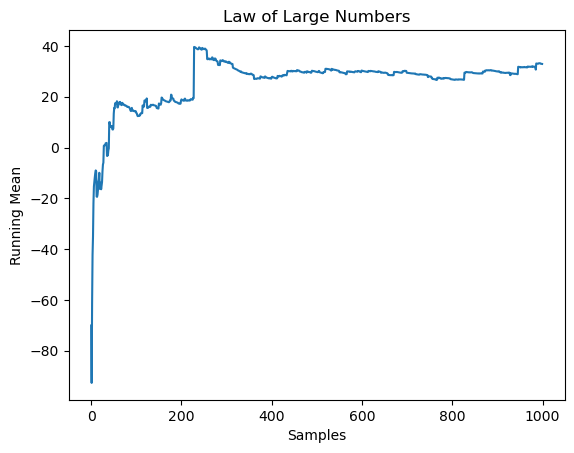

In [23]:
profits = np.random.choice(df['Profit'], size=1000)
running_mean = np.cumsum(profits) / np.arange(1,1001)

plt.plot(running_mean)
plt.title("Law of Large Numbers")
plt.xlabel("Samples")
plt.ylabel("Running Mean")
plt.show()

In [24]:
print("Expected Sales:", df['Sales'].mean())
print("Profit Variance:", df['Profit'].var())

Expected Sales: 229.85800083049833
Profit Variance: 54877.79805537903


In [25]:
df.to_csv("Cleaned_Superstore.csv", index=False)